<a href="https://colab.research.google.com/github/VernonNaidoo-Toronto/Understanding-Toronto-Shelters/blob/master/VN_Capacity_WiP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shelter Capacity Investigation
- Vernon Naidoo
- 2020-07-17

## Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random(42)

%config InlineBackend.figure_format = 'retina'

## Load and Concatenate Data Files

In [ ]:
# Load files from GitHub; add labels
path = 'https://raw.githubusercontent.com/VernonNaidoo-Toronto/Understanding-Toronto-Shelters/master/Shelter%20Data/'
dso2017=pd.read_csv(path + 'daily-shelter-occupancy-2017-csv.csv'); dso2017['source_file']=2017
dso2018=pd.read_csv(path + 'daily-shelter-occupancy-2018-csv.csv'); dso2018['source_file']=2018
dso2019=pd.read_csv(path + 'daily-shelter-occupancy-2019-csv.csv'); dso2019['source_file']=2019

# Get summary of records loaded
for year, df in [[2017,dso2017], [2018,dso2018], [2019,dso2019]]:
  print(f'Loaded {len(df)} records from the {year} file.')

Loaded 38700 records from the 2017 file.
Loaded 37770 records from the 2018 file.
Loaded 39446 records from the 2019 file.


In [ ]:
# Concatenate DataFrames
daily_shelter_occupancy = pd.concat([dso2017, dso2018, dso2019], ignore_index=True) 

# Get list of column names; change to Python standard lowercase:
cols = [column_name.lower() for column_name in daily_shelter_occupancy.columns] 
daily_shelter_occupancy.columns = cols

# Move source_file column to front of DataFrame
cols = cols[-1:] + cols[0:-1]
daily_shelter_occupancy = daily_shelter_occupancy[cols]

# Show head and tail
display(daily_shelter_occupancy.head())
display(daily_shelter_occupancy.tail())

source_file  _id       occupancy_date  ...    sector occupancy capacity
0         2017    1  2017-01-01T00:00:00  ...     Co-ed        16     16.0
1         2017    2  2017-01-01T00:00:00  ...       Men        13     17.0
2         2017    3  2017-01-01T00:00:00  ...       Men        63     63.0
3         2017    4  2017-01-01T00:00:00  ...  Families        66     70.0
4         2017    5  2017-01-01T00:00:00  ...       Men        58     60.0

[5 rows x 14 columns]

source_file    _id       occupancy_date  ... sector occupancy capacity
115911         2019  39442  2019-12-31T00:00:00  ...  Youth        15     15.0
115912         2019  39443  2019-12-31T00:00:00  ...  Youth        33     33.0
115913         2019  39444  2019-12-31T00:00:00  ...  Youth        20     20.0
115914         2019  39445  2019-12-31T00:00:00  ...  Co-ed         9     10.0
115915         2019  39446  2019-12-31T00:00:00  ...  Co-ed        41     41.0

[5 rows x 14 columns]

## First Look

#### Check for Nulls

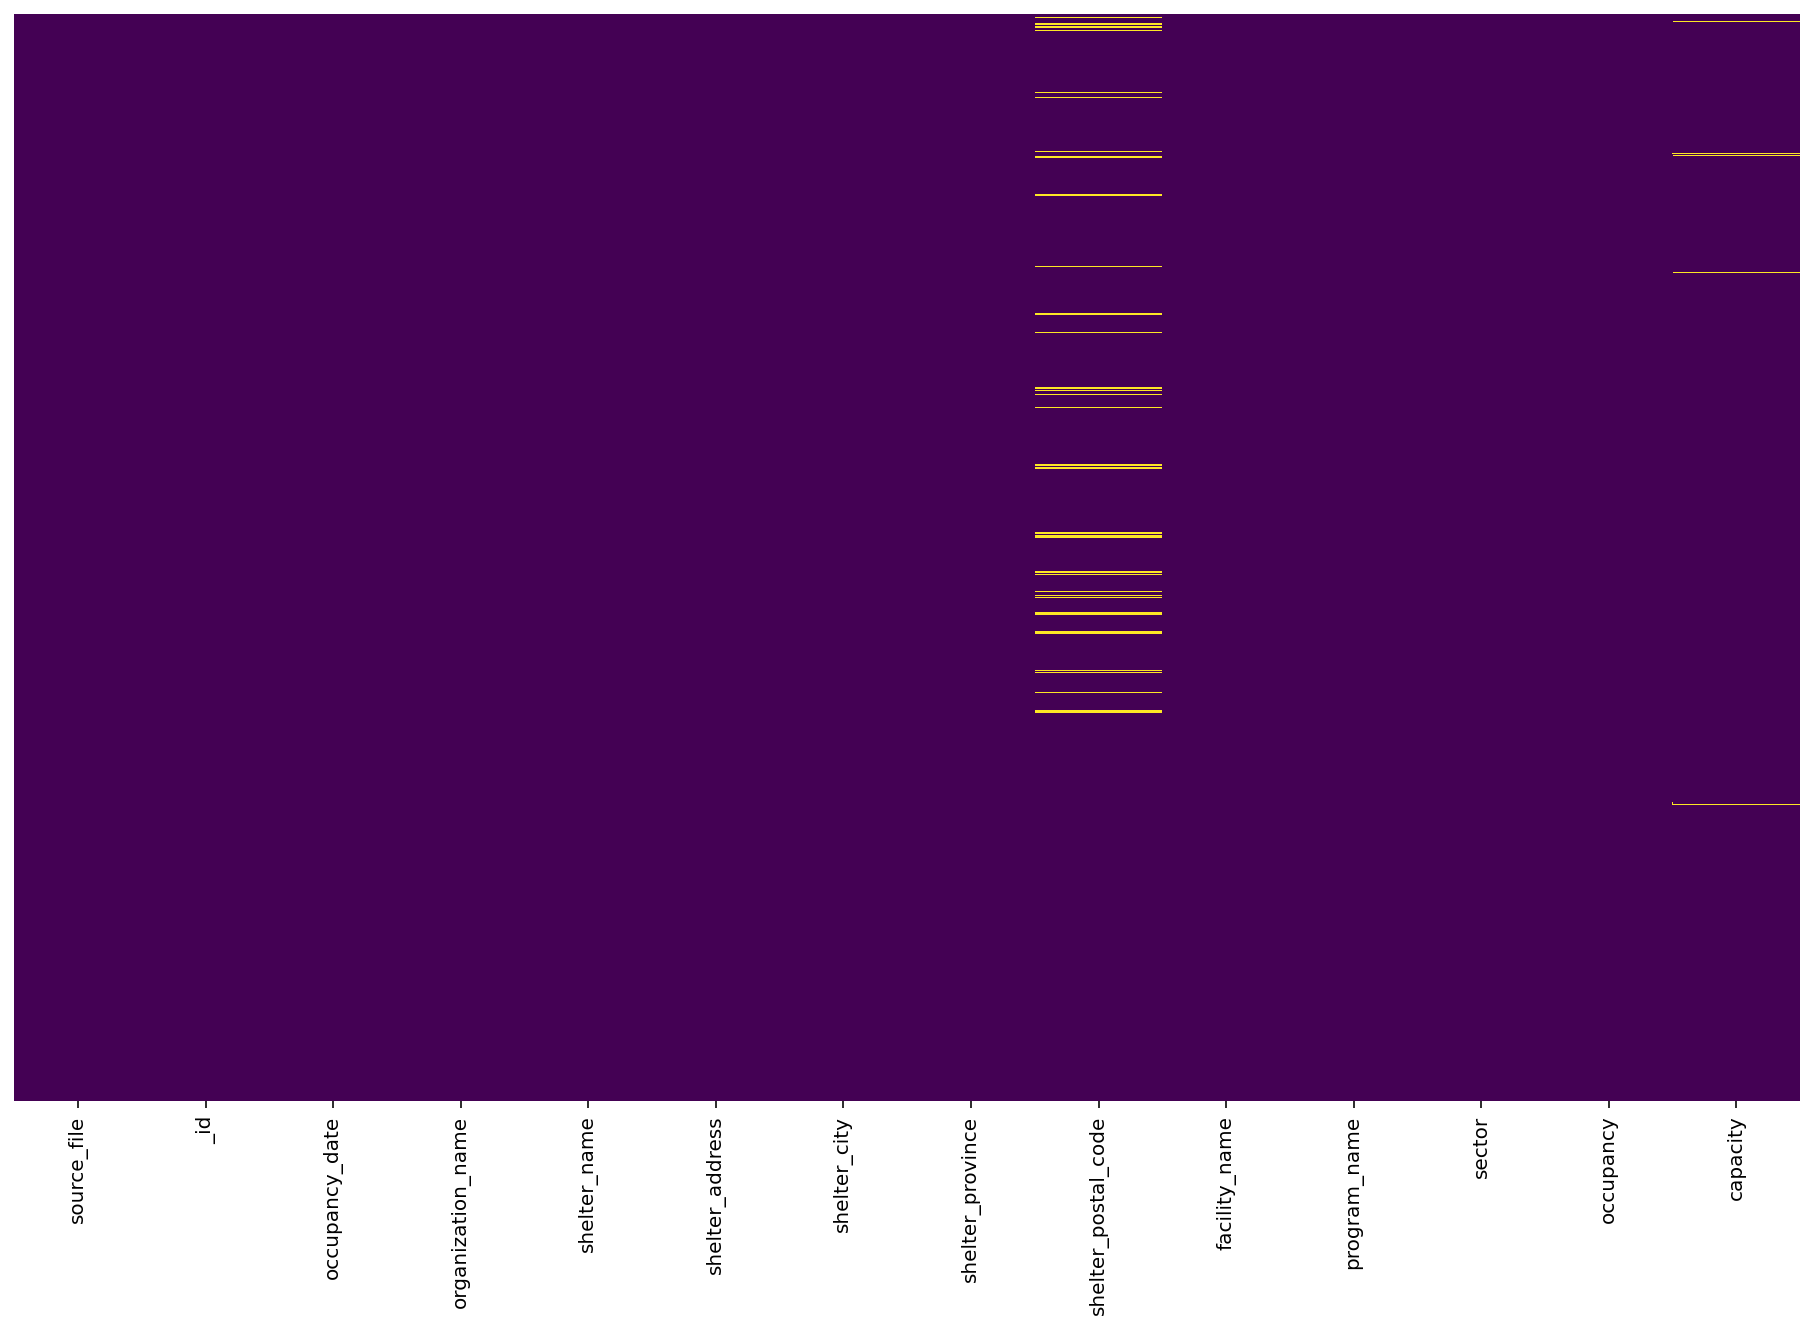

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(daily_shelter_occupancy.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis');

#### Check Data Types

In [ ]:
daily_shelter_occupancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38700 entries, 0 to 38699
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _id                  38700 non-null  int64  
 1   OCCUPANCY_DATE       38700 non-null  object 
 2   ORGANIZATION_NAME    38700 non-null  object 
 3   SHELTER_NAME         38700 non-null  object 
 4   SHELTER_ADDRESS      38700 non-null  object 
 5   SHELTER_CITY         38700 non-null  object 
 6   SHELTER_PROVINCE     38700 non-null  object 
 7   SHELTER_POSTAL_CODE  36126 non-null  object 
 8   FACILITY_NAME        38700 non-null  object 
 9   PROGRAM_NAME         38700 non-null  object 
 10  SECTOR               38700 non-null  object 
 11  OCCUPANCY            38700 non-null  int64  
 12  CAPACITY             38422 non-null  float64
dtypes: float64(1), int64(2), object(10)
memory usage: 3.8+ MB


## Check / correct Data Types

In [ ]:
# change date column from object to date!!!!!!